In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
data = pd.read_excel("C:/Users/Itshony/Desktop/캡스톤/Documents/Capstone/Seoul_location/종로구 실거래(13~18).xlsx")

# 데이터 통합 

In [5]:
A = ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구','마포구',
     '서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']

Temp1 = pd.DataFrame(columns= list(data.columns))

for i in A:
    Temp2 = pd.read_excel('C:/Users/Itshony/Desktop/캡스톤/Documents/Capstone/Seoul_location/%s 실거래(13~18).xlsx'%i)
    Temp2['구'] = i
    Temp1 = pd.concat([Temp1, Temp2], axis = 0)
    print(i, len(Temp2), len(Temp1))

Temp1 = Temp1.reset_index(drop=True)
data = Temp1.copy()

강남구 35089 35089
강동구 29823 64912
강북구 11162 76074
강서구 35174 111248
관악구 18305 129553
광진구 11426 140979
구로구 29243 170222
금천구 9590 179812
노원구 56698 236510
도봉구 24921 261431
동대문구 19928 281359
동작구 21966 303325
마포구 20985 324310
서대문구 16179 340489
서초구 26566 367055
성동구 21181 388236
성북구 29946 418182
송파구 38147 456329
양천구 27283 483612
영등포구 24162 507774
용산구 11210 518984
은평구 18681 537665
종로구 4411 542076
중구 6991 549067
중랑구 17593 566660


In [6]:
data.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [7]:
data.drop(['Unnamed: 0.1'], axis='columns', inplace=True)

In [8]:
data.loc[542075,'구']

'종로구'

In [9]:
data = data.drop(['국내총생산', '경제성장률','소비자물가', '집세', '환율'],axis=1)

In [10]:
data1 = data.drop(['도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드',
       '도로명일련번호코드', '도로명코드','법정동본번코드', '법정동부번코드', '법정동시군구코드',
       '법정동읍면동코드', '법정동지번코드', '아파트','일련번호', '지번', '지역코드','location', 'lat', 'lng','address'],axis=1)

In [12]:
data1.head(3) # data1= 전체 구 합친것. 

,거래금액,건축년도,년,도로명,법정동,월,일,전용면적,층,구
0,"22,116",2012,2013,역삼로25길,역삼동,1,2,16.41,5,강남구
1,"29,000",2002,2013,도곡로57길,역삼동,1,5,33.48,4,강남구
2,"90,000",2009,2013,도곡로43길,역삼동,1,6,84.97,13,강남구


In [11]:
data1['거래금액']=data['거래금액'].str.replace(',','').astype('int64')
data1['건축년도']=data1['건축년도'].astype('int64')
data['년']=data['년'].astype('int64')
data1['월'] = data['월'].astype('int64')
data1['일']=data['일'].astype('int64')
data1['전용면적']=data['전용면적'].astype('float64')
data1['층']=data1['층'].astype('int64')

In [12]:
# 구 분리 
강남구= data1[data1['구'] == '강남구']
강동구= data1[data1['구'] == '강동구']
강북구= data1[data1['구'] == '강북구']
강서구= data1[data1['구'] == '강서구']
관악구= data1[data1['구'] == '관악구']
광진구= data1[data1['구'] == '광진구']
구로구= data1[data1['구'] == '구로구']
금천구= data1[data1['구'] == '금천구']
노원구= data1[data1['구'] == '노원구']
도봉구= data1[data1['구'] == '도봉구']
동대문구= data1[data1['구'] == '동대문구']
동작구= data1[data1['구'] == '동작구']
마포구= data1[data1['구'] == '마포구']
서대문구= data1[data1['구'] == '서대문구']
서초구= data1[data1['구'] == '서초구']
성동구= data1[data1['구'] == '성동구']
성북구= data1[data1['구'] == '성북구']
송파구= data1[data1['구'] == '송파구']
양천구= data1[data1['구'] == '양천구']
영등포구= data1[data1['구'] == '영등포구']
용산구= data1[data1['구'] == '용산구']
은평구= data1[data1['구'] == '은평구']
종로구= data1[data1['구'] == '종로구']
중구= data1[data1['구'] == '중구']
중랑구= data1[data1['구'] == '중랑구']
종로구 = data1[data1['구'] == '종로구']

In [165]:
B = [강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,종로구]

## 전체 구에 대한 년별 평균값 추이 확인 
- 증가하는 경향 
- 범주형 변수로 대신? (1,2,3,4,5... 이런식으로 년에 가중치를 주는 방식?)

In [166]:
년=data1.groupby('년').거래금액.mean().reset_index()

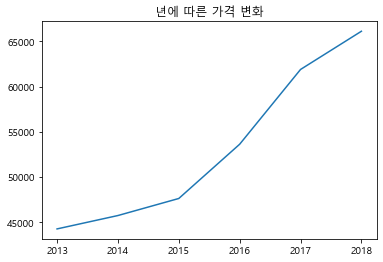

In [168]:
plt.title('년에 따른 가격 변화')
plt.plot(년['년'],년['거래금액']) # 전체 구에 대해서 각 년도에 대한 거래금액 평균값 사용

## 전체 구에 대한 월별 평균값 추이 확인
- 패턴이 보이지 않는다. 
- 패턴을 보이게끔 변수 변환 -> 분기별로 변환!

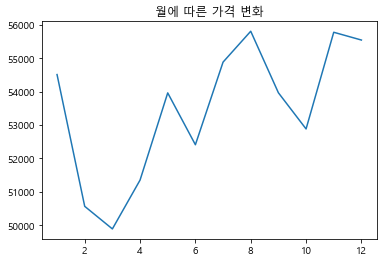

In [169]:
월=data1.groupby('월').거래금액.mean().reset_index()
plt.title('월에 따른 가격 변화')
plt.plot(월['월'],월['거래금액'])

In [177]:
월.loc[0:2,'월']=1
월.loc[3:5,'월']=2
월.loc[6:8,'월']=3
월.loc[8:11,'월']=4

In [191]:
월=월.groupby('월').거래금액.mean().reset_index()
월=월.rename({'월':'분기'},axis='columns')
월

,분기,거래금액
0,1,51655.998781
1,2,52576.539548
2,3,55352.046620
3,4,54547.599758


## 전체 구에 대한 분기별 평균 가격 변화
- 패턴을 보인다고 해야하나? 경향이 있나? 
- 내 눈에는 없어보이는데.. 
- 경향성을 갖도록 변수 재배치 -> 증가 경향을 보이는 **1,2,3을 1로 하고 4를 2로 범주형**

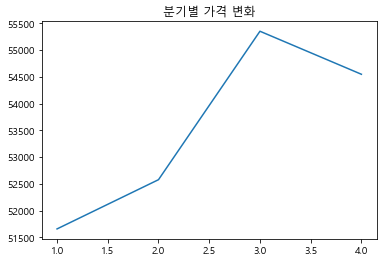

In [192]:
plt.title('분기별 가격 변화')
plt.plot(월['분기'],월['거래금액'])

In [203]:
월.loc[:2,'분기']=1
월.loc[3,'분기']=2
월

,분기,거래금액
0,1,51655.998781
1,1,52576.539548
2,1,55352.046620
3,2,54547.599758


In [205]:
월=월.groupby('분기').거래금액.mean().reset_index()
월

,분기,거래금액
0,1,53194.861650
1,2,54547.599758


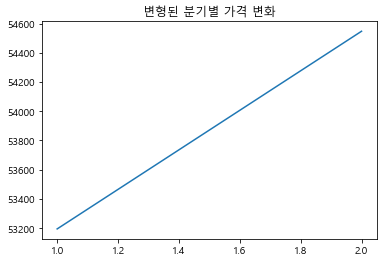

In [206]:
plt.title('변형된 분기별 가격 변화')
plt.plot(월['분기'],월['거래금액'])

## 전체 구에 대한 일별 가격 변화
- 10일 단위로 가겨 폭이 증가했다가 감소했다가 하는 걸 볼 수 있음 
- 10일 단위로 변수 재배치 -> 1~10일 1, 11-20일 2, 21일-31일 3

In [15]:
일=data1.groupby('일').거래금액.mean().reset_index()

In [16]:
일.loc[:4,'일'] = 1
일.loc[5:9,'일'] = 2
일.loc[10:14,'일']= 3
일.loc[15:19,'일']=4
일.loc[20:24,'일']=5
일.loc[25:,'일']=6

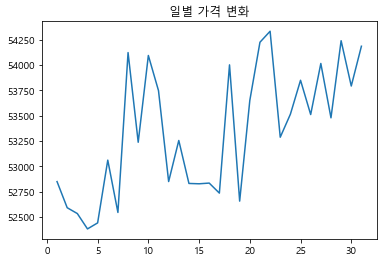

In [214]:
plt.title('일별 가격 변화')
plt.plot(일['일'],일['거래금액'])

In [17]:
일.loc[:9,'일'] = 1
일.loc[10:19,'일']=2
일.loc[20:,'일']=3

In [222]:
def groupby(a):
    return a.groupby('%s'%a).거래금액.mean().reset_index() 
# 이름은 똑같이 a인데 하나는 데이터 프레임이고 하나는 문자형이라서... 
# 이를 자동화 시키고 싶은데 어떻게 해야할까..

In [18]:
일 = 일.groupby('일').거래금액.mean().reset_index()
일

,일,거래금액
0,1,52986.562889
1,2,53139.564842
2,3,53858.044580


## 변형된 일별 가격 변화
- 연 말로 갈수록 매매가격이 높아지는 경향
- 경향성을 띄게 만듬 
- 연속형 변수

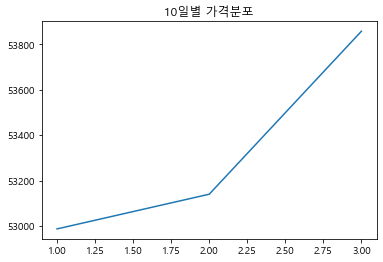

In [19]:
plt.title('10일별 가격분포')
plt.plot(일['일'],일['거래금액'])

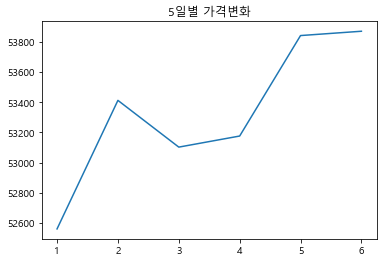

In [20]:
오일 = 일.groupby('일').거래금액.mean().reset_index()
plt.title('5일별 가격변화')
plt.plot(오일['일'],오일['거래금액'])

# 전용면적별 가격 분포
- 전용면적이 100 이상인게 거의 없는데 (상위75%의 평균이 84 .. ) 
- 왜 산점도를 그렸을 때는 100 이상이 엄청 많이 나오는 건지 모르겠다. 

## 강남구만을 대상으로 전용면적 급증 하는 구간 찾기

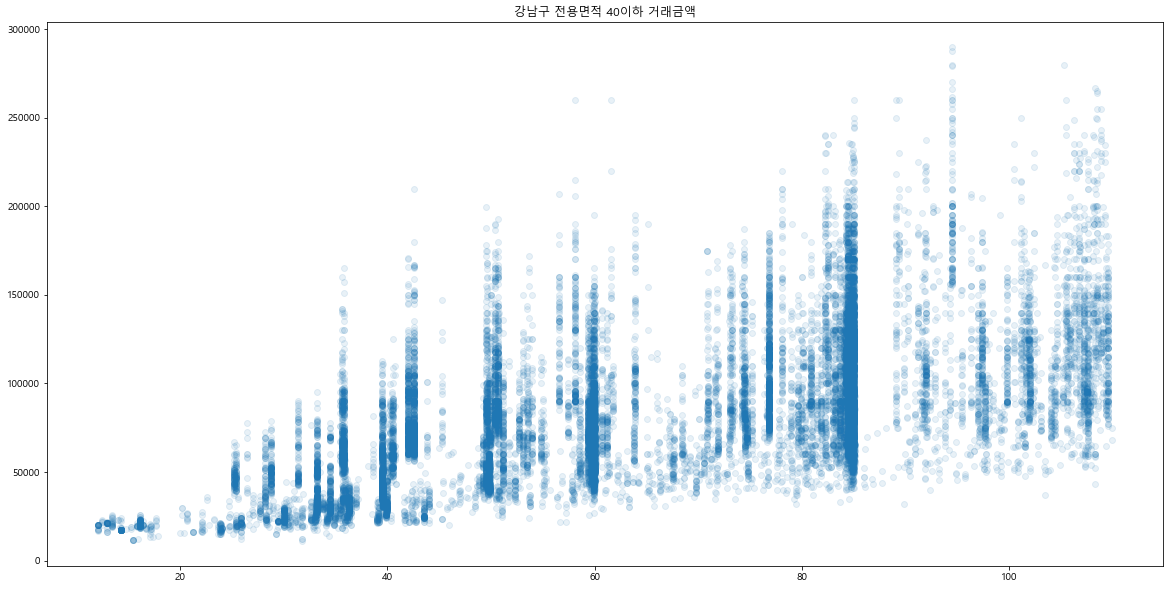

In [36]:
plt.figure(figsize=(20,10))
plt.title('강남구 전용면적 40이하 거래금액')
plt.scatter(강남구[강남구['전용면적']<110]['전용면적'],강남구[강남구['전용면적']<110]['거래금액'],alpha=0.1)

### 전용면적이 너무 다양하고 그 가격분포도 다양해서 나눌 구간을 찾지 못함. 그래서 전용면적별 평균을 구함.

In [38]:
강남구_평균=강남구.groupby(['전용면적']).거래금액.mean().reset_index()

In [165]:
강남구3 = 강남구

In [169]:
max(강남구3.전용면적)

424.32

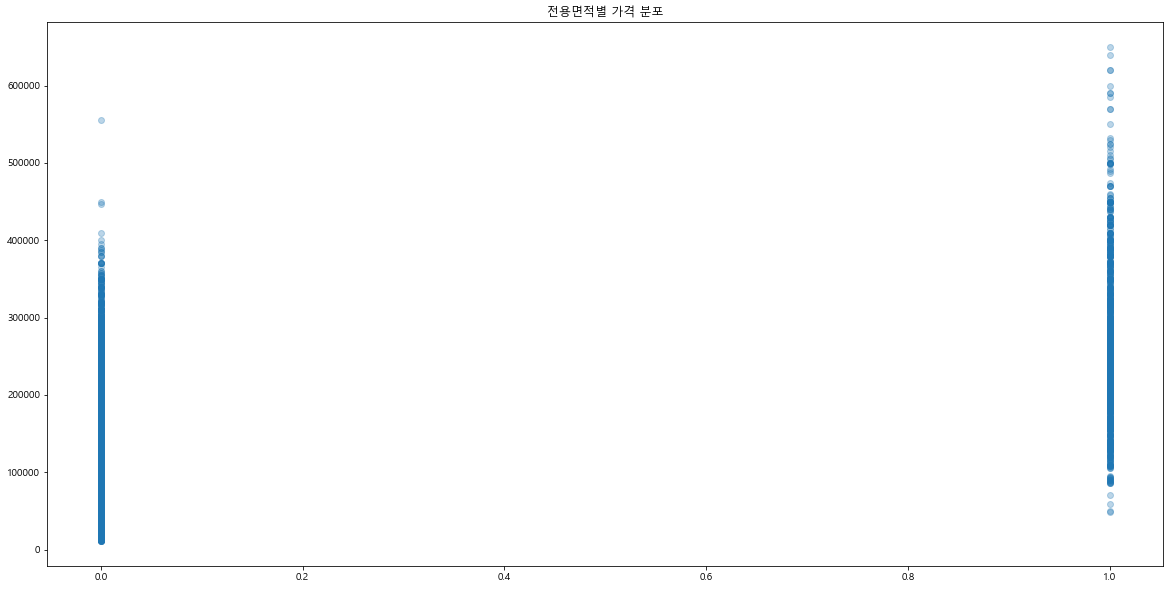

In [207]:
plt.figure(figsize=(20,10))
plt.title('전용면적별 가격 분포')
plt.scatter(강남구['전용면적']>180,강남구['거래금액'],alpha=0.3)

In [160]:
강남구3.loc[(강남구3.전용면적<40),'전용면적']=1
강남구3.loc[(강남구3.전용면적>40)&(강남구3.전용면적<=51.4),'전용면적']=2
강남구3.loc[(강남구3.전용면적>51.4)&(강남구3.전용면적<=62.8),'전용면적']=3
강남구3.loc[(강남구3.전용면적>62.8)&(강남구3.전용면적<=79.35),'전용면적']=4
강남구3.loc[(강남구3.전용면적>79.35)&(강남구3.전용면적<=95.9),'전용면적']=5
강남구3.loc[(강남구3.전용면적>95.9)&(강남구3.전용면적<=110),'전용면적']=6
강남구3.loc[(강남구3.전용면적>110)&(강남구3.전용면적<=135),'전용면적']=7
강남구3.loc[(강남구3.전용면적>135),'전용면적']=8

C:\Users\Itshony\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [162]:
강남구3.전용면적.value_counts().to_frame()

,전용면적
5.0,9211
7.0,4814
3.0,4451
8.0,4436
1.0,4152
2.0,3345
4.0,2410
6.0,2270


In [112]:
강남구.loc[4153,'전용면적']

109.49

In [95]:
len(강남구[강남구['전용면적']<40])

4152

In [108]:
len(강남구[강남구['전용면적']<51.4])

7497

In [102]:
len(강남구[강남구['전용면적']<62.8])-len(강남구[강남구['전용면적']<51.4])

4451

In [103]:
len(강남구[강남구['전용면적']<79.35])-len(강남구[강남구['전용면적']<62.8])

2410

In [104]:
len(강남구[강남구['전용면적']<95.9])-len(강남구[강남구['전용면적']<79.35])

9211

In [105]:
len(강남구[강남구['전용면적']<110])-len(강남구[강남구['전용면적']<95.9])

2270

In [106]:
len(강남구[강남구['전용면적']<135])-len(강남구[강남구['전용면적']<110])

4814

In [107]:
len(강남구[강남구['전용면적']>135])

4436

### 하지만 전용면적 종류도 많아서 1900개가 넘어감
### 그래서 전용면적을 소수점 첫째자리에서 반올림하여 값 변경, 평균값구함
### 235개 행으로 줄임 (전용면적의 종류가 235개)

In [55]:
강남구_평균.loc[:,'전용면적']=round(강남구_평균.loc[:,'전용면적'])

In [57]:
반올림_전용면적 = 강남구_평균.groupby(['전용면적']).거래금액.mean().reset_index() #평균값

In [68]:
반올림_전용면적1 = 강남구_평균.groupby(['전용면적']).거래금액.min().reset_index() #최소값

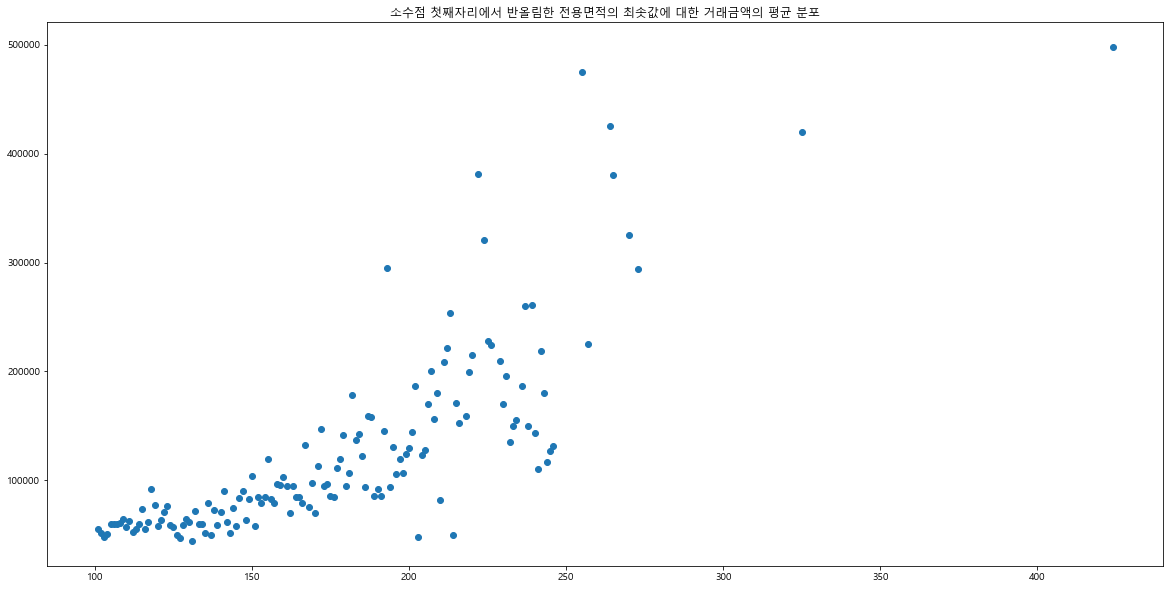

In [91]:
plt.figure(figsize=(20,10))
plt.title('소수점 첫째자리에서 반올림한 전용면적의 최솟값에 대한 거래금액의 평균 분포')
plt.scatter(반올림_전용면적1[반올림_전용면적['전용면적']>100]['전용면적'],반올림_전용면적1[반올림_전용면적['전용면적']>100]['거래금액'])

In [64]:
반올림_전용면적[반올림_전용면적['전용면적']<100]['전용면적']

0     12.0
1     13.0
2     14.0
3     15.0
4     16.0
      ... 
82    95.0
83    96.0
84    97.0
85    98.0
86    99.0
Name: 전용면적, Length: 87, dtype: float64

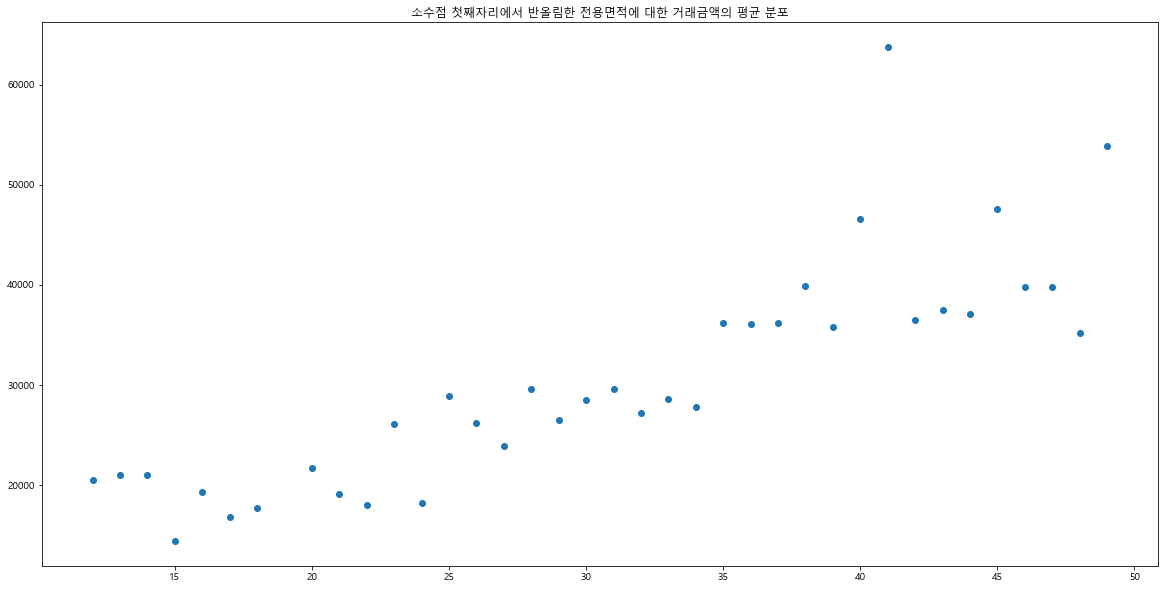

In [79]:
plt.figure(figsize=(20,10))
plt.title('소수점 첫째자리에서 반올림한 전용면적에 대한 거래금액의 평균 분포')
plt.scatter(반올림_전용면적[반올림_전용면적['전용면적']<50]['전용면적'],반올림_전용면적[반올림_전용면적['전용면적']<50]['거래금액'])

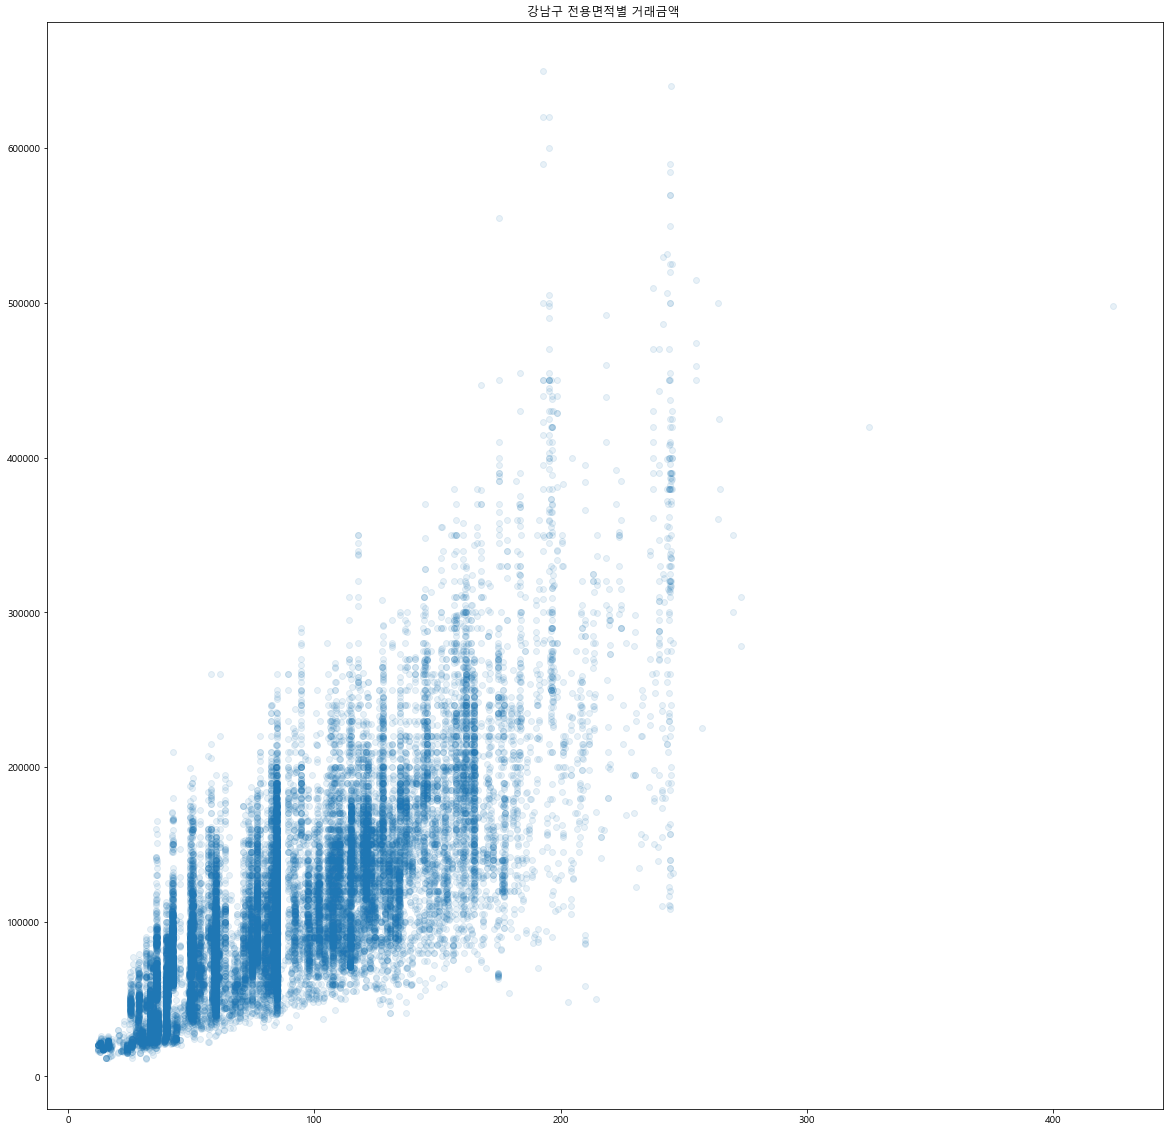

In [22]:
plt.figure(figsize=(20,20))
plt.title('강남구 전용면적별 거래금액 ')
plt.scatter(강남구['전용면적'],강남구['거래금액'],alpha=0.1)

In [336]:
data1.describe()
# 일단 전용면적이 84 정도일 떄의 거래가 압도적으로 많음 
# 나머지 84 이상의 큰 평수는 25%에서 진행된다고도 볼수 있음 

,거래금액,건축년도,년,월,일,전용면적,층
count,566660.000000,566660.00000,566660.000000,566660.000000,566660.000000,566660.000000,566660.000000
mean,53341.465466,1998.81172,2015.595202,6.300531,15.838379,78.777954,8.927244
std,37676.348535,9.21669,1.573844,3.233385,8.731464,29.465866,6.038420
min,700.000000,1961.00000,2013.000000,1.000000,1.000000,11.955900,-4.000000
25%,31500.000000,1993.00000,2014.000000,4.000000,8.000000,59.770000,4.000000
50%,43400.000000,2000.00000,2016.000000,6.000000,16.000000,84.210000,8.000000
75%,62400.000000,2005.00000,2017.000000,9.000000,23.000000,84.970000,13.000000
max,820000.000000,2018.00000,2018.000000,12.000000,31.000000,424.320000,69.000000


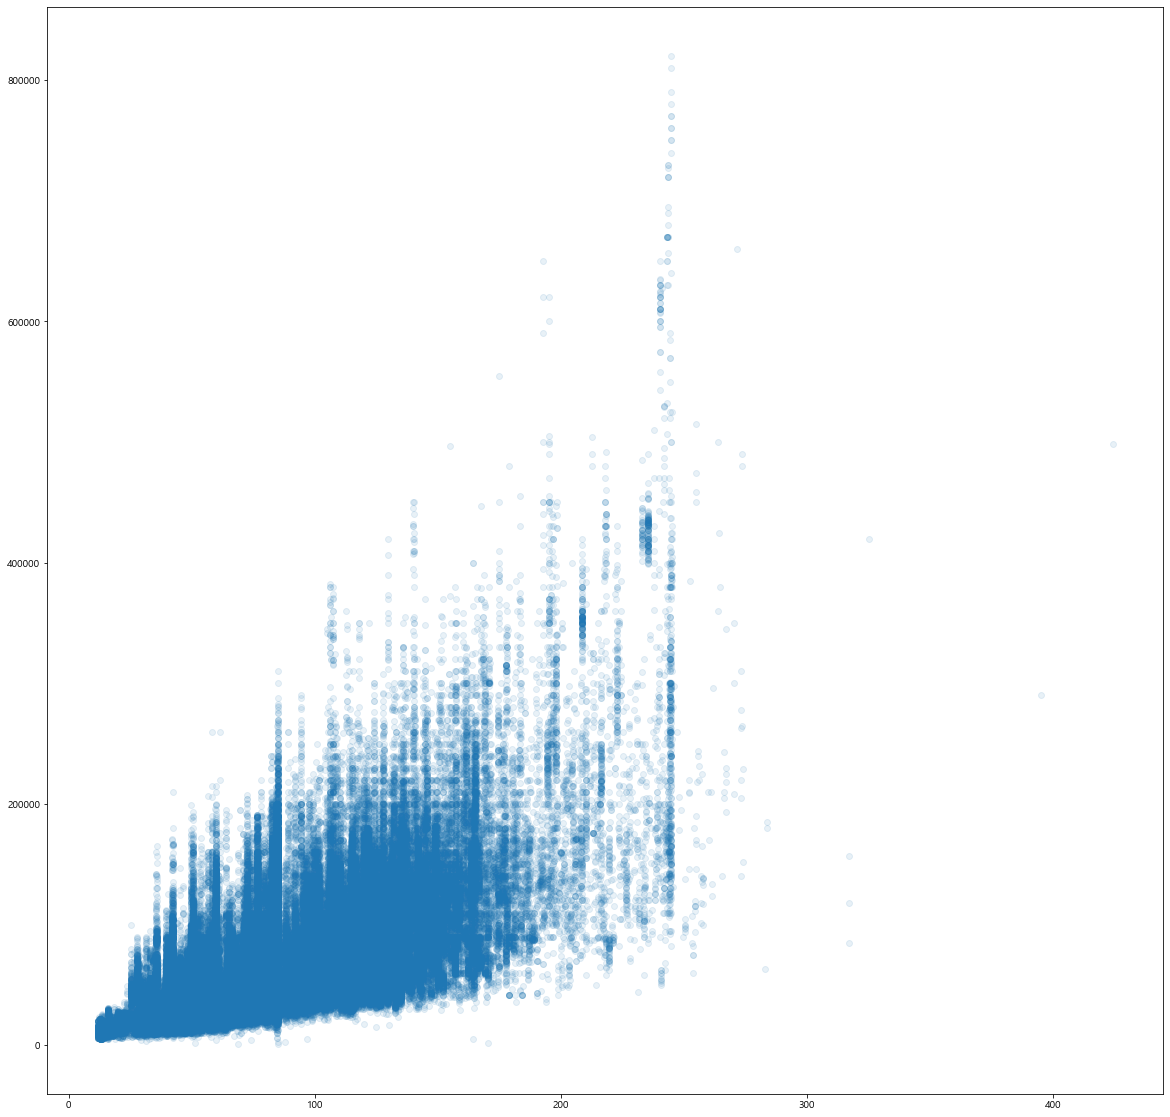

In [255]:
plt.figure(figsize=(20,20))
plt.scatter(data1['전용면적'],data1['거래금액'],alpha=0.1)

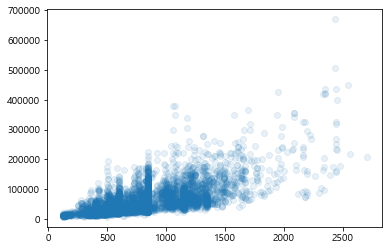

In [273]:
A = np.random.randint(0, len(data1),10000)
data2 = data1.loc[data1.index.isin(A)]
plt.scatter(data2['전용면적']*10,data2['거래금액'],alpha=0.1)

## 구별 전용면적별 거래금액

In [277]:
data2[data2['구']=='강남구']['전용면적']

29        59.910
57        50.780
64        41.990
84        28.790
135       84.236
          ...   
34855    119.580
34914     25.890
34967     85.000
35000    163.680
35030     73.260
Name: 전용면적, Length: 592, dtype: float64

In [287]:
구별전용면적별=data1.groupby(['구','전용면적']).거래금액.mean().reset_index()

In [300]:
pivot = 구별전용면적별.pivot(columns='전용면적',index='구',values='거래금액').reset_index()

In [323]:
pivot.head(1)

전용면적,구,11.9559,12.0,12.01,12.0156,12.02,12.04,12.05,12.06,12.07,...,273.45,273.54,273.86,273.967,283.0,283.76,317.36,325.39,395.06,424.32
0,강남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294000.0,NaN,NaN,NaN,NaN,NaN,NaN,420000.0,NaN,498000.0


In [321]:
#plt.scatter(pivot[pivot['구']],전용면적,alpha=0.1) 
# pivot 으로 하려 했으나... null 값 너무 많이 발생 + 전용면적 값들이 colymns으로 들어감..

In [335]:
구별전용면적별.head(3)

,구,전용면적,거래금액
0,강남구,12.100,19213.5
1,강남구,12.449,22312.5
2,강남구,12.470,20050.0


In [332]:
구별전용면적별.describe()
# 구별로 먼저 묶고, 그다음 전용면적별로 묶어서 그 때의 거래금액의 평균을 계산 
# 구별 전용면적별 여러개의 거래금액의 평균을 계산 한 것. 
# 그래서 전용면적이 겹치지 않음. 
# 그랬더니 상위 75%의 값이 109가 나옴 !
# 어쩄든 전체 거래의 상위 25% 의 전용면적은 100이 넘어가고, 
# 대부분이 84이다. 

,전용면적,거래금액
count,21755.000000,21755.000000
mean,88.549078,55779.017443
std,43.024648,48879.560462
min,11.955900,2000.000000
25%,59.958000,28100.000000
50%,82.050000,40000.000000
75%,109.065000,65500.000000
max,424.320000,775000.000000


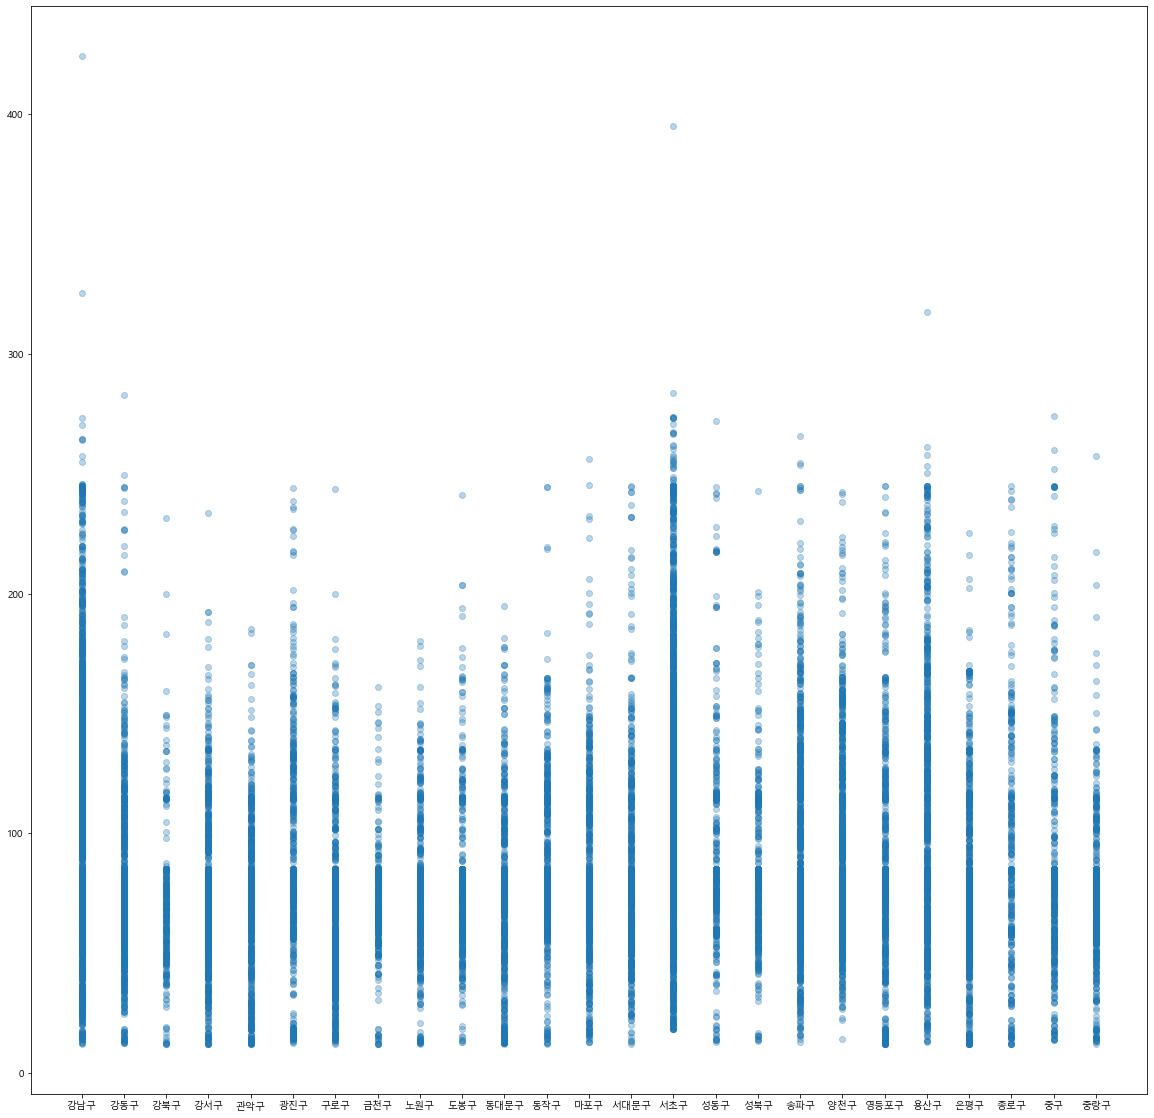

In [330]:
plt.figure(figsize=(20,20))
plt.scatter(구별전용면적별['구'],구별전용면적별['전용면적'],alpha=0.3) #구별 전용면적 분포
# 구별 전용면적 분포로 나눠서 전용면적이 어디에 많이 분포하고 있는지 확인. 
# 확실히 100 이하기 많고, 100 이상으로 넘어가는 경우도 꽤 있음. 하지만 100 이하가 훨씬 많음
# 강남,서초,성동,

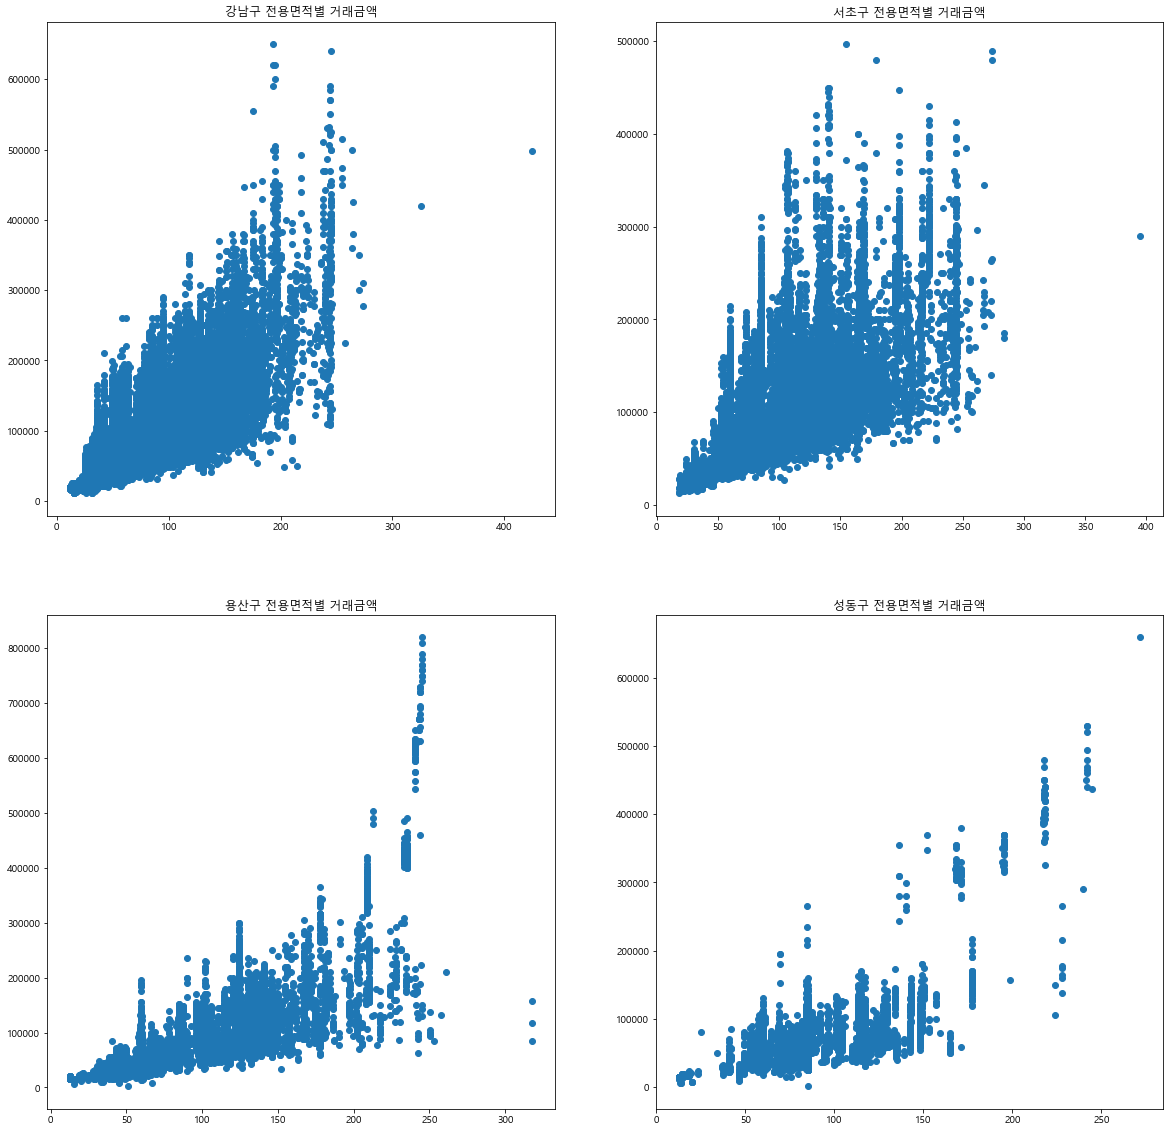

In [343]:
plt.figure(figsize=(20,20))


plt.subplot(221)
plt.title('강남구 전용면적별 거래금액')
plt.scatter(강남구['전용면적'],강남구['거래금액'])

plt.subplot(222)
plt.title('서초구 전용면적별 거래금액')
plt.scatter(서초구['전용면적'],서초구['거래금액']) 

plt.subplot(223)
plt.title('용산구 전용면적별 거래금액')
plt.scatter(용산구['전용면적'],용산구['거래금액'])

plt.subplot(224)
plt.title('성동구 전용면적별 거래금액')
plt.scatter(성동구['전용면적'],성동구['거래금액']) 
# 구별로 사이즈에 대한 가중치를 다르게 줘야 하나 고민해서
# 이 그래프를 통해 구 별 다른 추이를 보이지 않을까 해서 그래프를 그려보니
# (상위 4개구에 대해서만 그렸고,)
# 강남구 용산구 성동구는 사이즈가 증가함에 따라 가격도 증가하는 추이를 보이는데 
# 서초구는 100 이상의 사이즈가 되면 가격이 오히려 조금 감소하는 형태를 보임 
# 그래도 사이즈와 상관관계가 0.8 이상으로 큰 편이니
# 사이즈가 커짐에 따라 매매가격도 높아지는 경향을 보인다고 할 수 있다. 
# 따라서 사이즈를 묶어서 1,2,3... 이런식으로 값을 주고 이를 연속형 변수로 의미 부여!(숫자가 증가할수록 거래금액도 증가하니깐)

## 논문을 따라 전용면적의 범주형 변수를 연속형으로 변경

In [171]:
강남구['전용면적_cut']=pd.cut(강남구.전용면적,bins=[0,40,51.4,62.8,79.35,95.9,110,135,424.32],labels=[1,2,3,4,5,6,7,8])

C:\Users\Itshony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
강남구['전용면적_cut'].unique()

[1, 5, 3, 4, 7, 2, 6, 8]
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

### 전용면적을 범주화(연속형변수) 한 것과 거래금액과의 상관관계

In [258]:
강남구['거래금액'].corr(강남구['전용면적_cut'])

0.6864770863328542

# 파생변수 생성

## 1. 년별 동일지역 동일면적 아파트의 매매가의 평균 YR_AVEG

In [220]:
list=강남구['도로명'].value_counts().reset_index()

In [224]:
강남구['동일지역_동일면적_평균']=''

C:\Users\Itshony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [260]:
list1=강남구.groupby(['도로명','년','전용면적_cut']).거래금액.mean()

In [261]:
list2=list1.reset_index()

In [291]:
list2=list2.dropna(axis=0)

In [292]:
list2

,도로명,년,전용면적_cut,거래금액
0,강남대로,2013,1,24125.000000
1,강남대로,2013,2,38500.000000
3,강남대로,2013,4,44814.285714
4,강남대로,2013,5,53500.000000
8,강남대로,2014,1,25372.000000
...,...,...,...,...
13860,헌릉로590길,2017,5,73375.000000
13862,헌릉로590길,2017,7,87607.142857
13866,헌릉로590길,2018,3,76200.000000
13868,헌릉로590길,2018,5,94970.588235


In [281]:
list=강남구['도로명'].unique()

In [293]:
list_년=list2['년'].unique()

In [295]:
list_cut=list2['전용면적_cut'].unique()

In [278]:
for h in range(len(강남구)):
    for i in range(len(list)):
        if 강남구.at[h,'도로명']==list2.at[i]:
            for j in range(len(list_년)):
                if 강남구.at[h,'년']==list_년[j]:
                    for k in range(len(list_cut)):
                        if 강남구.at[h,'전용면적_cut']==list_cut[k]:
                            강남구.at[h,'동일지역_동일면적_평균']=list2


0        False
1        False
2        False
3        False
4        False
         ...  
35084    False
35085     True
35086    False
35087    False
35088    False
Name: 도로명, Length: 35089, dtype: bool

In [ ]:
if 강남구.loc['도로명']

## 2. 도로명별 년별 동일면적별 매매건수 (YR_COUNT)

,거래금액,건축년도,년,도로명,법정동,월,일,전용면적,층,구,전용면적_cut,동일지역_동일면적_평균
0,22116,2012,2013,역삼로25길,역삼동,1,2,16.410,5,강남구,1,
1,29000,2002,2013,도곡로57길,역삼동,1,5,33.480,4,강남구,1,
2,90000,2009,2013,도곡로43길,역삼동,1,6,84.970,13,강남구,5,
3,63000,2005,2013,선릉로69길,역삼동,1,7,59.400,14,강남구,3,
4,69000,2005,2013,선릉로69길,역삼동,1,8,59.606,4,강남구,3,
...,...,...,...,...,...,...,...,...,...,...,...,...
35084,63000,2005,2018,도곡로14길,도곡동,12,12,58.050,3,강남구,3,
35085,37900,2006,2018,강남대로,도곡동,12,13,33.800,15,강남구,1,
35086,173000,2007,2018,도곡로28길,도곡동,12,14,130.259,24,강남구,7,
35087,95500,1996,2018,언주로30길,도곡동,12,20,120.210,12,강남구,7,


## 층별 가격 분포

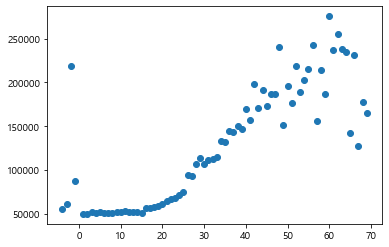

In [379]:
층=data1.groupby('층').거래금액.mean().reset_index()
plt.scatter(층['층'],층['거래금액'])

In [275]:
data1['층'].describe()

count    566660.000000
mean          8.927244
std           6.038420
min          -4.000000
25%           4.000000
50%           8.000000
75%          13.000000
max          69.000000
Name: 층, dtype: float64

In [269]:
층

,층,거래금액
0,-4,55567.000000
1,-3,61233.666667
2,-2,218974.352941
3,-1,87957.402985
4,1,49849.908249
...,...,...
68,65,142433.333333
69,66,231500.000000
70,67,127500.000000
71,68,177562.500000


In [288]:
층=data1.groupby('층').거래금액.mean().reset_index()

In [347]:
data1[data1['층']==-2]

,거래금액,건축년도,년,도로명,법정동,월,일,전용면적,층,구
145677,37000,2014,2014,오리로,천왕동,3,27,84.780,-2,구로구
159015,47150,2014,2016,오리로,천왕동,8,11,84.710,-2,구로구
160218,45500,2014,2016,오리로,천왕동,10,2,84.870,-2,구로구
518244,624000,2011,2016,독서당로,한남동,2,5,240.230,-2,용산구
518373,558000,2011,2016,독서당로,한남동,9,22,240.305,-2,용산구
518388,620000,2011,2016,독서당로,한남동,10,26,240.305,-2,용산구
518552,600000,2011,2018,독서당로,한남동,4,4,240.230,-2,용산구
518567,620000,2011,2018,독서당로,한남동,6,26,240.305,-2,용산구
523901,76533,2010,2014,진관2로,진관동,11,6,167.750,-2,은평구
523933,55797,2010,2014,진관2로,진관동,11,26,134.510,-2,은평구


In [369]:
list = data[data['아파트']=='한남더힐'][['거래금액','층','년','전용면적']]

In [373]:
list.groupby(['년','층','전용면적']).거래금액.mean().reset_index()

,년,층,전용면적,거래금액
0,2014,1,59.686,79100.0
1,2014,1,59.700,77900.0
2,2014,1,208.478,317900.0
3,2014,1,243.201,630000.0
4,2014,1,243.642,643250.0
...,...,...,...,...
204,2018,10,233.062,485000.0
205,2018,10,235.312,439000.0
206,2018,11,233.062,444000.0
207,2018,11,235.312,443000.0


In [375]:
list1= data[data['아파트']=='한남더힐']['전용면적']

In [378]:
list1

518109     59.686
518110     59.686
518111     59.686
518112     59.686
518113     59.686
           ...   
518626    240.230
518627    235.312
518628    177.764
518629    243.642
518630    233.062
Name: 전용면적, Length: 522, dtype: float64